<a href="https://colab.research.google.com/github/engrvitalis/Python-ELM/blob/master/ANN_ELM_Welding_Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the needed *files*

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Result.csv to Result.csv


Import relevant packages.

In [ ]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.linalg import pinv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Read and display table. The table is expected to start with the input variables before the target variables. 

In [ ]:
def get_variables(file, num_target):
  """
  input: dataframe.
  output: tuple of dataframes containing target and input variables respectively.
  """
  
  # Read in file.
  df = pd.read_csv(file)
  # Get the target columns.
  target_columns = df.iloc[:, -num_target:]
  # Get the input columns.
  input_columns = df.iloc[:, :num_target+1]

  return (target_columns, input_columns)

dat = get_variables("Result.csv", 4)
dat[0].iloc[:, 0]

Generate the necessary variables for modeling

In [ ]:
X = dat[0].to_numpy()
y = dat[1].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.5)

In [ ]:
y_test

array([[1.000e-01, 5.348e+01, 1.082e+01, 2.609e+01, 8.020e+00],
       [1.000e-02, 5.076e+01, 1.082e+01, 2.674e+01, 1.269e+01],
       [1.000e-01, 5.348e+01, 1.015e+01, 2.674e+01, 1.041e+01],
       [1.000e-01, 5.348e+01, 1.042e+01, 2.538e+01, 1.269e+01],
       [1.000e-02, 5.076e+01, 1.042e+01, 2.609e+01, 1.041e+01]])

Analyzing Weiding data with ANN

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

reg = MLPRegressor(hidden_layer_sizes=(30, 30),activation="relu" ,random_state=1, max_iter=5000).fit(X_trainscaled, y_train)

y_ann_pred=reg.predict(X_testscaled)
ann_r2 = r2_score(y_ann_pred, y_test)
ann_rmse = np.sqrt(mean_squared_error(y_test, y_ann_pred))
ann_mae = mean_absolute_error(y_test, y_ann_pred)

print("The ANN model performance for testing set")
print("--------------------------------------")
print(f'R^2:\t{ann_r2}')
print(f'rmse:\t{ann_rmse}')
print(f'mae:\t{ann_mae}')
print('\n')

The ANN model performance for testing set
--------------------------------------
R^2:	-0.5268247795988825
rmse:	6.085395728329207
mae:	4.235070242513378




Analyzing Welding data with ELM

In [ ]:
input_size = X_train.shape[1]
hidden_size = 5000
input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

def relu(x):
   return np.maximum(x, 0, x)

def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)

def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

y_elm_pred = predict(X_test)
elm_r2 = r2_score(y_test, y_elm_pred)
elm_rmse = np.sqrt(mean_squared_error(y_test, y_elm_pred))
elm_mae = mean_absolute_error(y_test, y_elm_pred)

print("The Elm model performance for testing set")
print("--------------------------------------")
print(f'R^2:\t{elm_r2}')
print(f'rmse:\t{elm_rmse}')
print(f'mae:\t{elm_mae}')

The Elm model performance for testing set
--------------------------------------
R^2:	-1.4124360863921872
rmse:	1.5717649796388025
mae:	1.038878335420786


Visualization

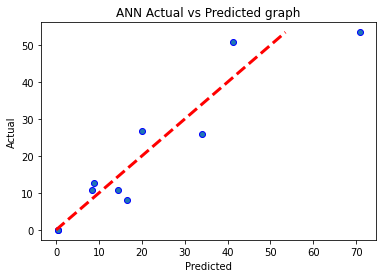

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_ann_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_title('ANN Actual vs Predicted graph')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

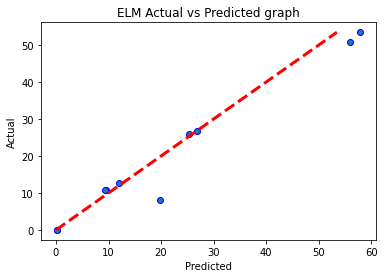

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_elm_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_title('ELM Actual vs Predicted graph')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
data = [['R^2', elm_r2, ann_r2], ['rmse', elm_rmse, ann_rmse], ['mae', elm_mae, ann_mae]]
metric_table = pd.DataFrame(data, columns=['Score', 'ELM', 'ANN'])
metric_table

,Score,ELM,ANN
0,R^2,-7.568979,-3.281787
1,rmse,4.356798,7.800538
2,mae,2.614250,6.069786


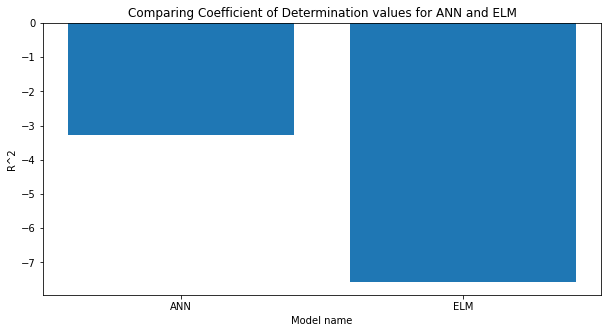

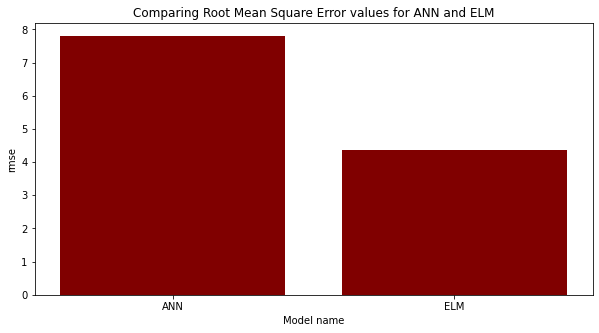

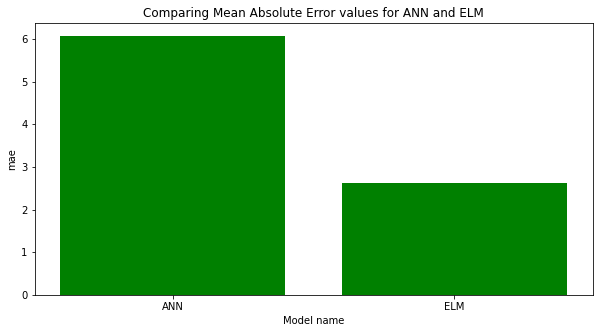

In [ ]:
# creating the dataset
r2 = {'ANN':ann_r2, 'ELM':elm_r2}
models = list(r2.keys())
R2 = list(r2.values())

plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, R2)
 
plt.xlabel("Model name")
plt.ylabel("R^2")
plt.title("Comparing Coefficient of Determination values for ANN and ELM")

plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, [ann_rmse, elm_rmse], color ='maroon')
 
plt.xlabel("Model name")
plt.ylabel("rmse")
plt.title("Comparing Root Mean Square Error values for ANN and ELM")

plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, [ann_mae, elm_mae], color ='green')
 
plt.xlabel("Model name")
plt.ylabel("mae")
plt.title("Comparing Mean Absolute Error values for ANN and ELM")

plt.show()
